In [182]:
import pandas as pd
import numpy as np
import subprocess
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from datetime import datetime

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)
sns.set(style="whitegrid")

# Data  Preparation

1).focus is always to understand the final structure


2).support each step by visual analytics

# Data confirmed (Covid 19)

In [183]:
#csv file is read from the John Hopkins link
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [184]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/8/22', '6/9/22', '6/10/22', '6/11/22', '6/12/22', '6/13/22',
       '6/14/22', '6/15/22', '6/16/22', '6/17/22'],
      dtype='object', length=878)

In [185]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180784,180864,180864,180864,180864,181120,181178,181236,181465,181534
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276518,276583,276638,276690,276731,276731,276821,276821,276821,277141
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265909,265920,265925,265925,265927,265937,265943,265952,265964,265968
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43224,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [186]:
git_pull = subprocess.Popen( "/usr/bin/git pull" , 
                     cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()

In [187]:
#slicing to get the required columns
time_idx=pd_raw.columns[4:]

In [188]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [189]:
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [190]:
#slicing the data of the required countries
pd_raw[pd_raw['Country/Region']=='Italy'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [191]:
country_list=['Italy', 'Kazakhstan','Armenia',]

In [192]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [193]:
df_plot.head()

,date,Italy,Kazakhstan,Armenia
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0


In [194]:
#dividing confirmed cases with population of each country
df_plot['Italy'] = df_plot['Italy'].div(59550000)
df_plot['Kazakhstan'] = df_plot['Kazakhstan'].div(18750000)
df_plot['Armenia'] = df_plot['Armenia'].div(2963000)


Text(0, 0.5, 'Confirmed cases')

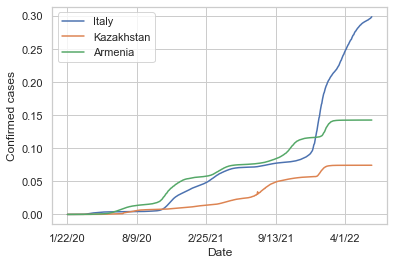

In [195]:
%matplotlib inline
df_plot= df_plot.set_index('date').plot()
df_plot.set_xlabel('Date')
df_plot.set_ylabel('Confirmed cases')

# Data Vaccination (Covid 19)

Github- https://github.com/govex/COVID-19/blob/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv

In [196]:
vc_data= r"C:\Users\ASUS\OneDrive\Desktop\Data Science\My DE\cov19_datascience\data\raw\time_series_covid19_vaccine_global.csv"

In [197]:
vc_data= pd.read_csv(vc_data)

In [198]:
vc_data

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.000000e+00,0.000000e+00,0.000000e+00,2020-12-14,124.0,NaN
1,World,2020-12-14,5.000000e+00,0.000000e+00,0.000000e+00,2020-12-14,NaN,NaN
2,Canada,2020-12-15,7.230000e+02,0.000000e+00,0.000000e+00,2020-12-15,124.0,NaN
3,China,2020-12-15,1.500000e+06,0.000000e+00,0.000000e+00,2020-12-15,156.0,NaN
4,Russia,2020-12-15,2.850000e+04,2.850000e+04,0.000000e+00,2020-12-15,643.0,NaN
...,...,...,...,...,...,...,...,...
256547,West Bank and Gaza,2022-06-19,3.729762e+06,NaN,NaN,2022-06-20,275.0,NaN
256548,World,2022-06-19,1.160871e+10,4.987743e+09,4.558894e+09,2022-06-20,NaN,NaN
256549,Yemen,2022-06-19,8.386210e+05,6.929680e+05,4.414040e+05,2022-06-20,887.0,NaN
256550,Zambia,2022-06-19,6.675386e+06,3.240892e+06,4.165002e+06,2022-06-20,894.0,NaN


In [199]:
vc_data.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.0,0.0,0.0,2020-12-14,124.0,NaN
1,World,2020-12-14,5.0,0.0,0.0,2020-12-14,NaN,NaN
2,Canada,2020-12-15,723.0,0.0,0.0,2020-12-15,124.0,NaN
3,China,2020-12-15,1500000.0,0.0,0.0,2020-12-15,156.0,NaN
4,Russia,2020-12-15,28500.0,28500.0,0.0,2020-12-15,643.0,NaN


In [200]:
df1= vc_data.drop(['Doses_admin', 'People_partially_vaccinated', 'Report_Date_String', 'UID', 'Province_State'], axis=1, inplace=True)
df2=vc_data.rename(columns={'Country_Region': 'Country', 'People_fully_vaccinated': 'Vaccinated_People'})

In [201]:
df2.head()

,Country,Date,Vaccinated_People
0,Canada,2020-12-14,0.0
1,World,2020-12-14,0.0
2,Canada,2020-12-15,0.0
3,China,2020-12-15,0.0
4,Russia,2020-12-15,0.0


In [202]:
#vaccinated people in Italy 
df_Italy = df2[df2["Country"] == 'Italy'].copy()
df_Italy['Vaccinated_People'] = df_Italy['Vaccinated_People'].div(59550000)

In [203]:
#vaccinated people in Kazakhstan
df_Kazakhstan = df2[df2["Country"]=='Kazakhstan'].copy()
df_Kazakhstan['Vaccinated_People'] = df_Kazakhstan['Vaccinated_People'].div(18750000)

In [204]:
#vaccinated people in Armenia
df_Armenia = df2[df2["Country"]=='Armenia'].copy()
df_Armenia['Vaccinated_People'] = df_Armenia['Vaccinated_People'].div(2963000)

In [205]:
Italy = df_Italy.dropna()
Kazakhstan = df_Kazakhstan.dropna()
Armenia = df_Armenia.dropna()

In [206]:
df_country = [Italy, Kazakhstan, Armenia]

In [207]:
#concat method used to merge the countries
final_df = pd.concat(df_country).reset_index(drop=True)

In [208]:
final_df

,Country,Date,Vaccinated_People
0,Italy,2020-12-27,0.000000
1,Italy,2020-12-28,0.000000
2,Italy,2020-12-29,0.000000
3,Italy,2020-12-30,0.000000
4,Italy,2020-12-31,0.000000
...,...,...,...
1443,Armenia,2022-06-15,0.332706
1444,Armenia,2022-06-16,0.332706
1445,Armenia,2022-06-17,0.332706
1446,Armenia,2022-06-18,0.332706


In [209]:
final_df['Date'] =  pd.to_datetime(final_jo['Date'], format='%Y-%m-%d')

In [210]:
plot = pe.line(final_df, x="Date", y="Vaccinated_People", color = 'Country', title='Vaccination Rate per population of Italy, Kazakhstan and Armenia')
plot.show()